In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Snow Ball Pricing Based on BSM

In [4]:
from snowball import *

## Pricing Three different Products

## Product 1

In [20]:
texp = 2
coupon_rate = 0.157
nominal_amount = 1000000
bound = [0.75, 1.0]
model = BSM_model
n_path = 30000
n_time = texp * 365
dt = 1/365
start_date = datetime(2021,8,26)
check_knockout_date = [datetime(2021,11,26),datetime(2021,12,24),datetime(2022,1,26),
                       datetime(2022,2,25),datetime(2022,3,25),datetime(2022,4,26),
                       datetime(2022,5,26),datetime(2022,6,24),datetime(2022,7,26),
                       datetime(2022,8,26),datetime(2022,9,26),datetime(2022,10,26),
                       datetime(2022,11,25),datetime(2022,12,26),datetime(2023,1,30),
                       datetime(2023,2,24),datetime(2023,3,24),datetime(2023,4,26),
                       datetime(2023,5,26),datetime(2023,6,26),datetime(2023,7,26),datetime(2023,8,25)]
snowball = SnowBallOption(texp, nominal_amount, coupon_rate, bound, model, n_path, n_time, start_date, check_knockout_date)
print(f'Snow Ball price is {snowball.price(spot_price=1000)}')

Snow Ball price is 39299.64965317078


## Analysis the volatility influence on Snow Ball Option Price

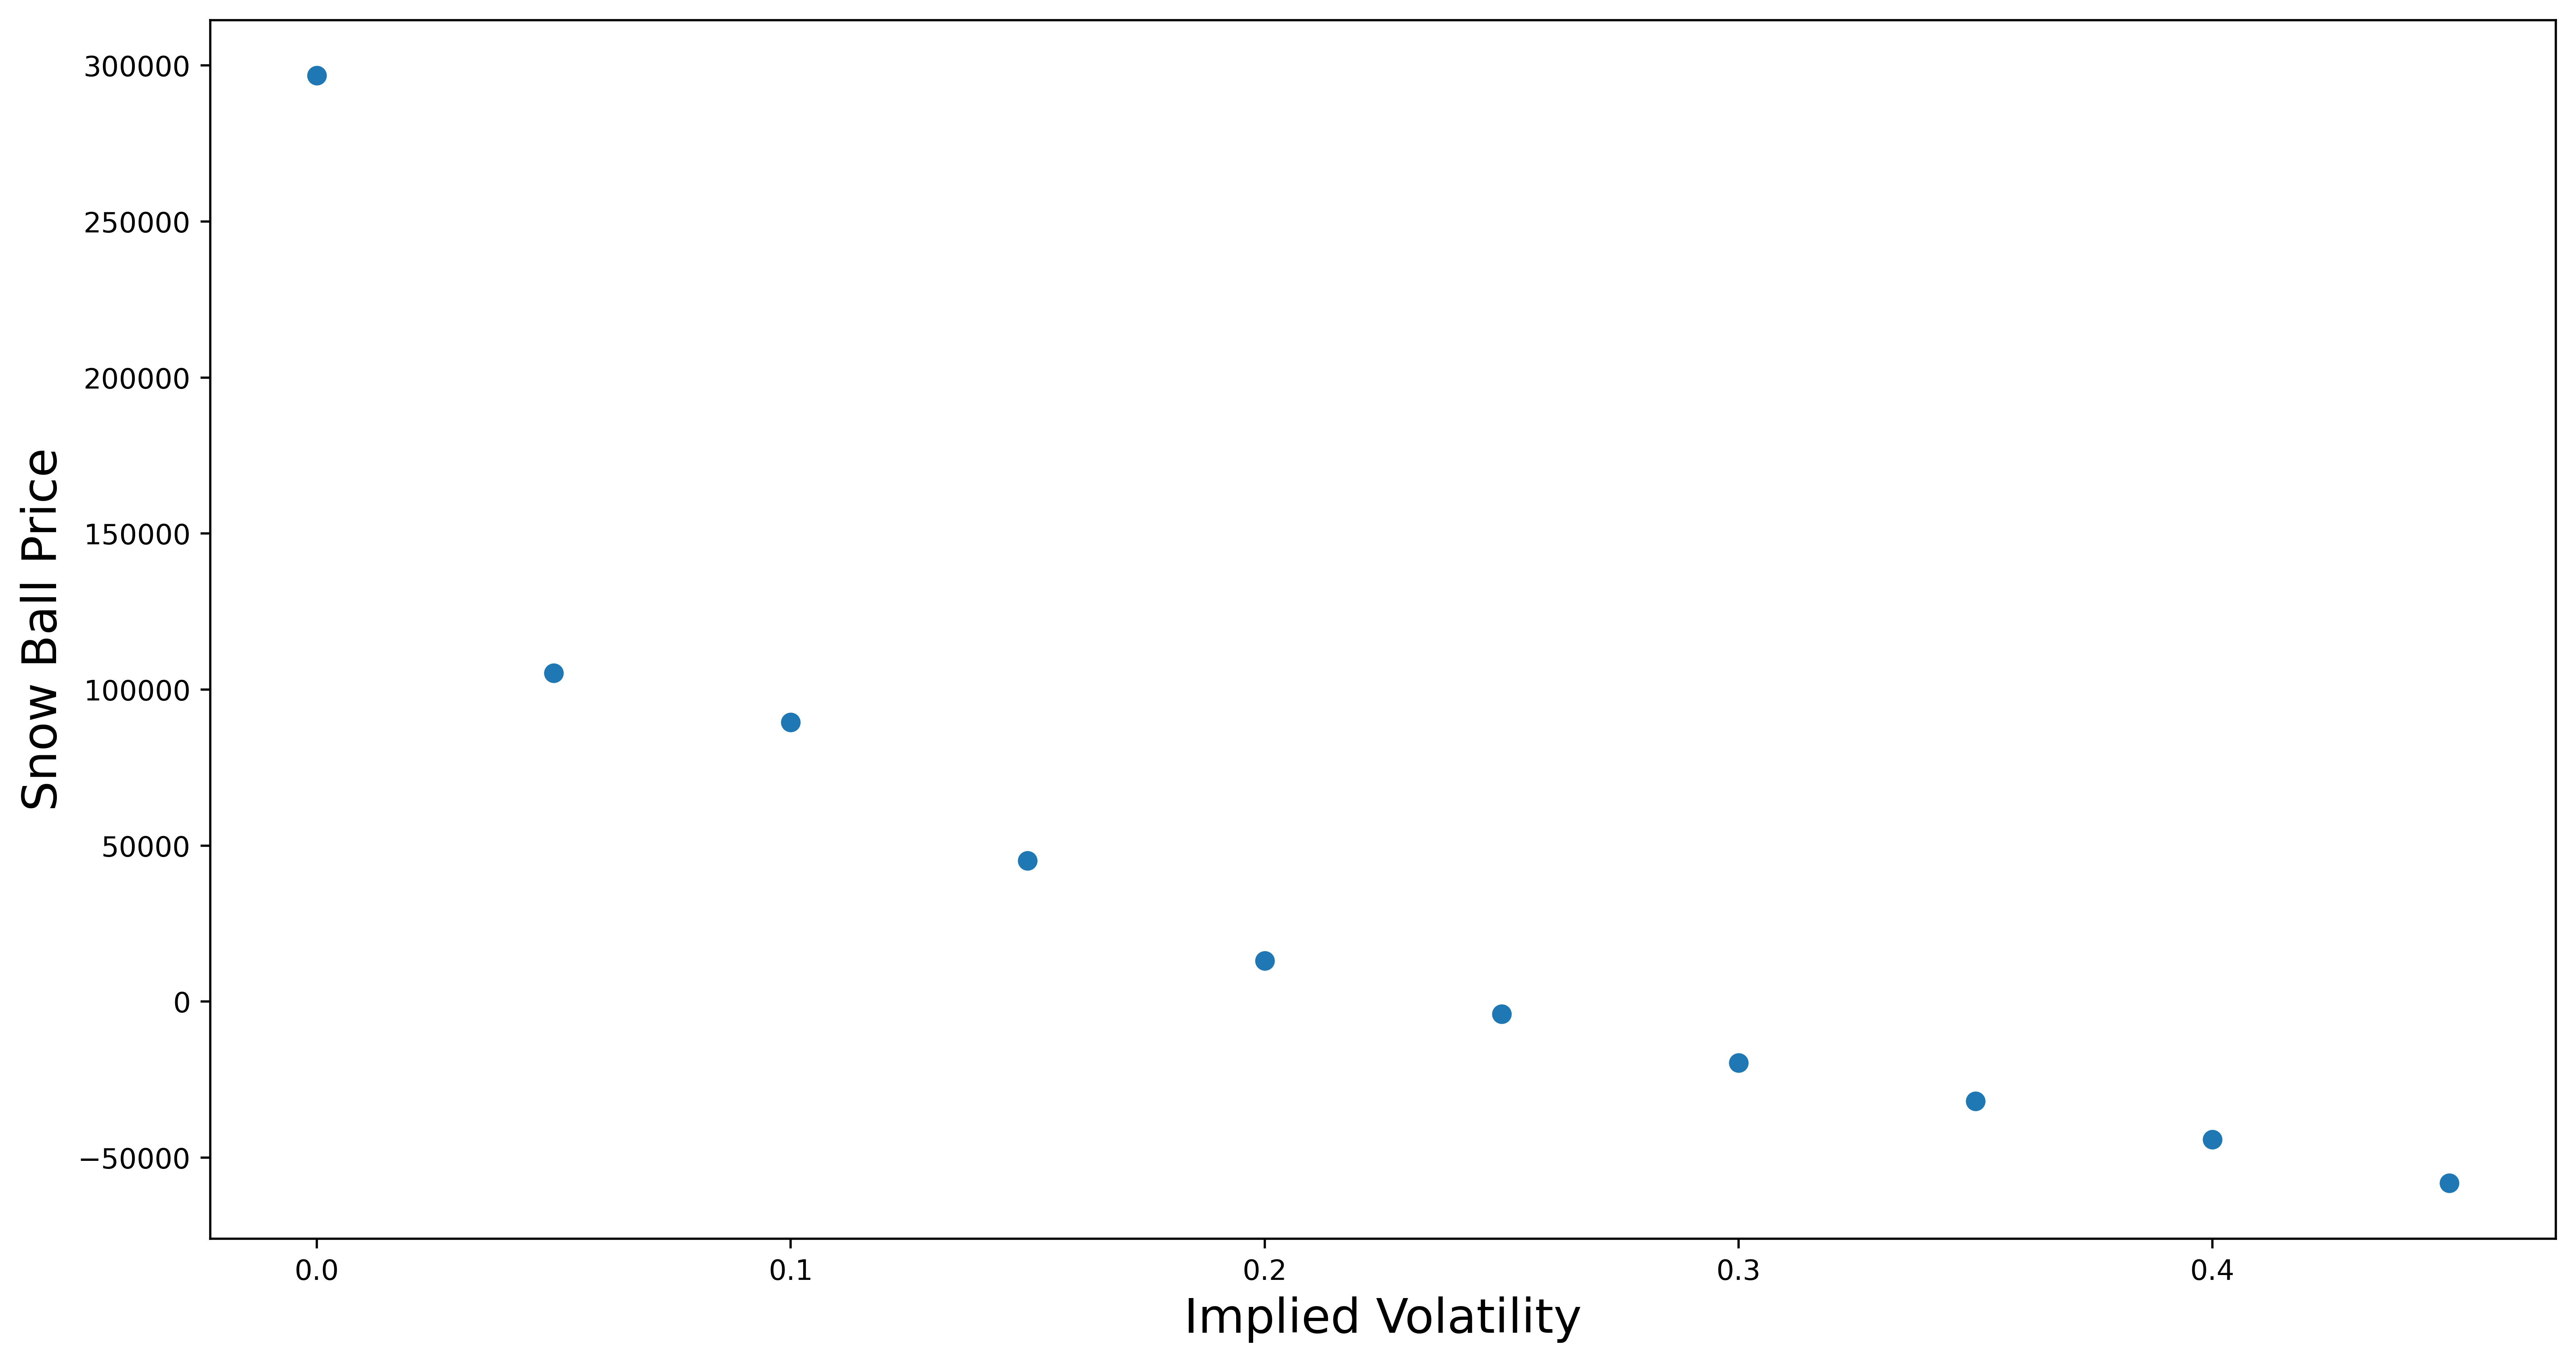

In [29]:
def analysis_sigma(snowball):
    sigma_list = np.arange(0.0,0.5,0.05)
    price_list = []
    for sigma in sigma_list:
        BSM_model.sigma = sigma
        price_list.append(snowball.price(spot_price=1000))
    plt.figure(figsize=(15,8),dpi=500)
    plt.scatter(x=sigma_list, y=price_list,)
    plt.xlabel('Implied Volatility',fontsize=17)
    plt.ylabel('Snow Ball Price',fontsize=17)
    plt.savefig('./IV_analysis.png')
    plt.show()
BSM_model.miu = 0.0
analysis_sigma(snowball)

## Analysis the Underlying Assets return influence on Snow Ball Option Price

In [30]:
def analysis_miu(snowball):
    df = pd.DataFrame(columns=['log return','knock out rate','knock in not out rate','both None rate','win rate','price'])
    miu_list = np.arange(0,0.45,0.05)
    for i,miu in enumerate(miu_list):
        BSM_model.miu = miu
        mc_res = snowball.MC_res(spot_price=1000)
        df.loc[i,'log return'] = miu
        df.loc[i,'knock out rate'] = (mc_res['knock_out'] == True).sum() / len(mc_res)
        df.loc[i,'knock in not out rate'] = ((mc_res['knock_out'] == False) & (mc_res['knock_in'] == True)).sum() / len(mc_res)
        df.loc[i, 'both None rate'] = ((mc_res['knock_out'] == False) & (mc_res['knock_in'] == False)).sum() / len(mc_res)
        df.loc[i,'win rate'] = df.loc[i,'knock out rate'] + df.loc[i, 'both None rate']
        df.loc[i,'price'] = mc_res['discounted payoff'].mean()
#     df = df.astype(float)
#     df = df.round(4)
    return df
BSM_model.sigma = 0.2
df = analysis_miu(snowball)


In [31]:
df

,log return,knock out rate,knock in not out rate,both None rate,win rate,price
0,0.0,0.810167,0.168433,0.0214,0.831567,14600.011317
1,0.05,0.8749,0.108967,0.016133,0.891033,36329.906219
2,0.1,0.922067,0.0647,0.013233,0.9353,49043.42366
3,0.15,0.9558,0.0368,0.0074,0.9632,53139.892452
4,0.2,0.9774,0.0182,0.0044,0.9818,54337.867524
5,0.25,0.989767,0.007767,0.002467,0.992233,52849.662013
6,0.3,0.995533,0.0035,0.000967,0.9965,50212.354353
7,0.35,0.9984,0.001267,0.000333,0.998733,47910.137749
8,0.4,0.9993,0.0005,0.0002,0.9995,45965.870928
